# Workflow


## Packages

`filpy` is my own package. See the [README](./README.md)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import filpy
from filpy import u
from filpy import cube_stuff as cb


Package Dir: /home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/filaments_strc_param/filpy
Project Dir: /home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/filaments_strc_param


/home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## IRAM

### Load data

Data are in `MJy / sr` where `Jy = W / (m**2 Hz)`

In [3]:
from filpy import IR_PATHS

IR60_HDUL, IR60_DATA   = filpy.get_data_fit(IR_PATHS[0],display_plots=False) 
IR100_HDUL, IR100_DATA = filpy.get_data_fit(IR_PATHS[1],display_plots=False) 


Filename: /home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/filaments_strc_param/MBM40/IR/IRAS-60_RA+DEC_242.64+21.822.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   (1000, 1000)   float32   
 - HEADER -
SIMPLE  =                    T / Written by SkyView Thu Oct 17 10:19:07 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                 1000 / Width of image                                 
NAXIS2  =                 1000 / Height of image                                
CRVAL1  =   242.64199999999994 / Reference longitude                            
CRVAL2  =               21.822 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                  

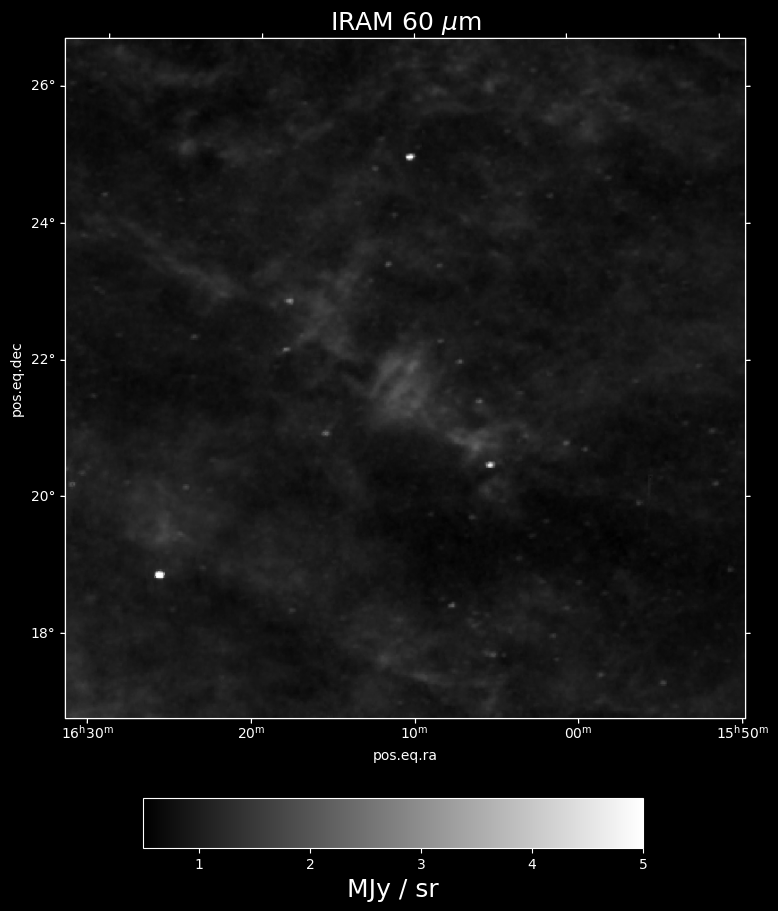

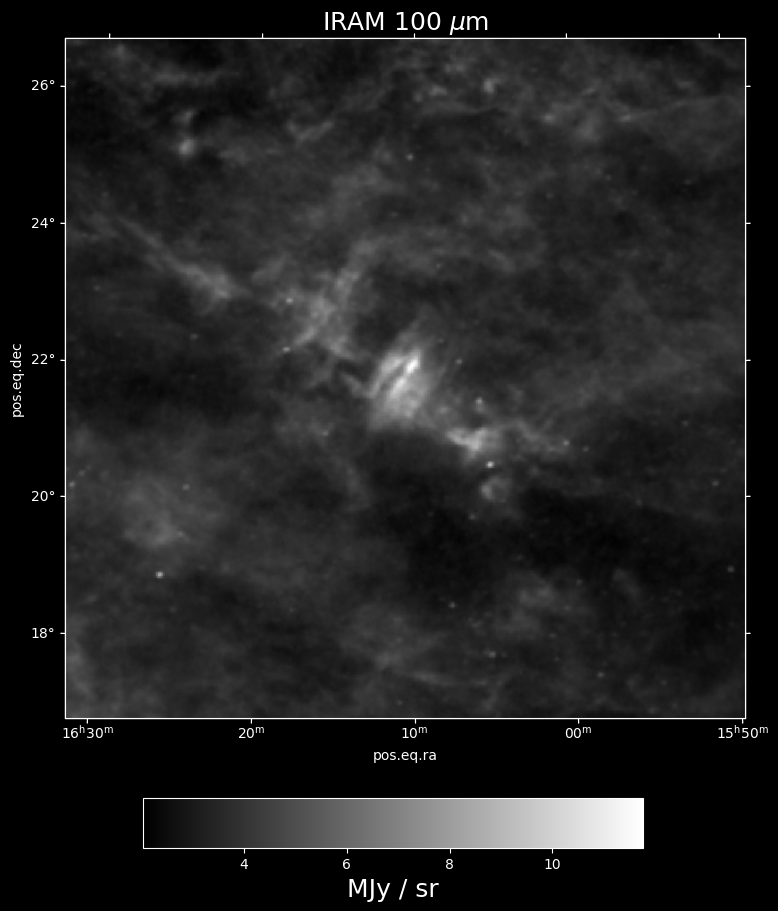

In [4]:
INT_UNIT = 'MJy / sr'

ir60_wcs = cb.WCS(IR60_HDUL[0].header)
filpy.show_image(IR60_DATA,projection=ir60_wcs,title='IRAM 60 $\\mu$m',show=True,vmax=5,barlabel=INT_UNIT)

ir100_wcs = cb.WCS(IR100_HDUL[0].header)
filpy.show_image(IR100_DATA,projection=ir100_wcs,title='IRAM 100 $\\mu$m',show=True,barlabel=INT_UNIT)



### Sobel filter

After smoothing the image by a Gaussian filter, apply the Sobel filter to the image in order to magnify the edges

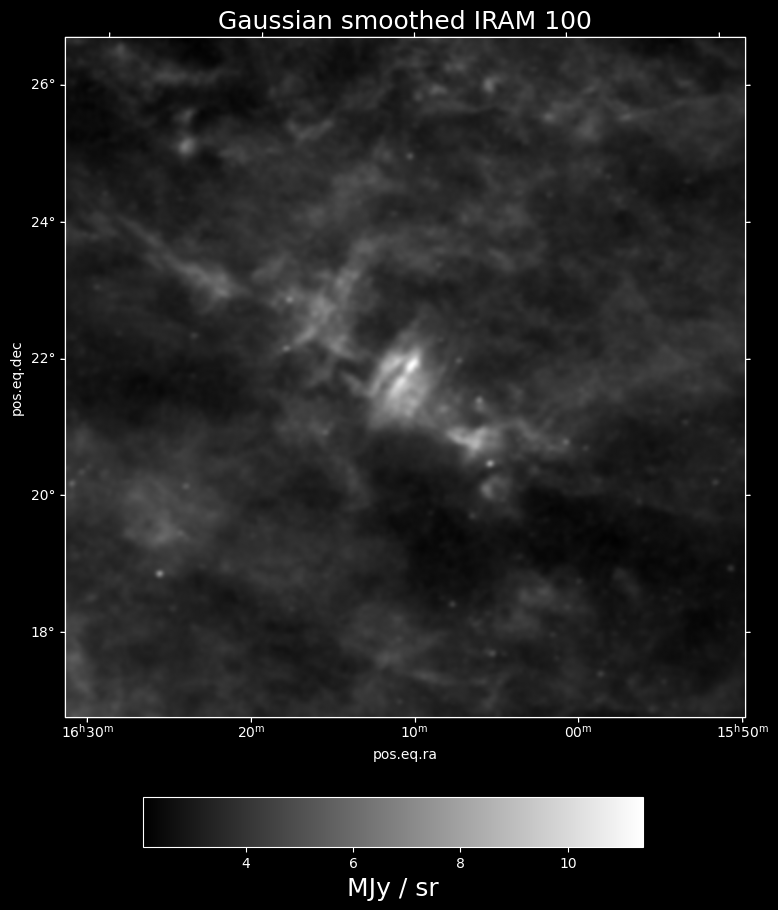

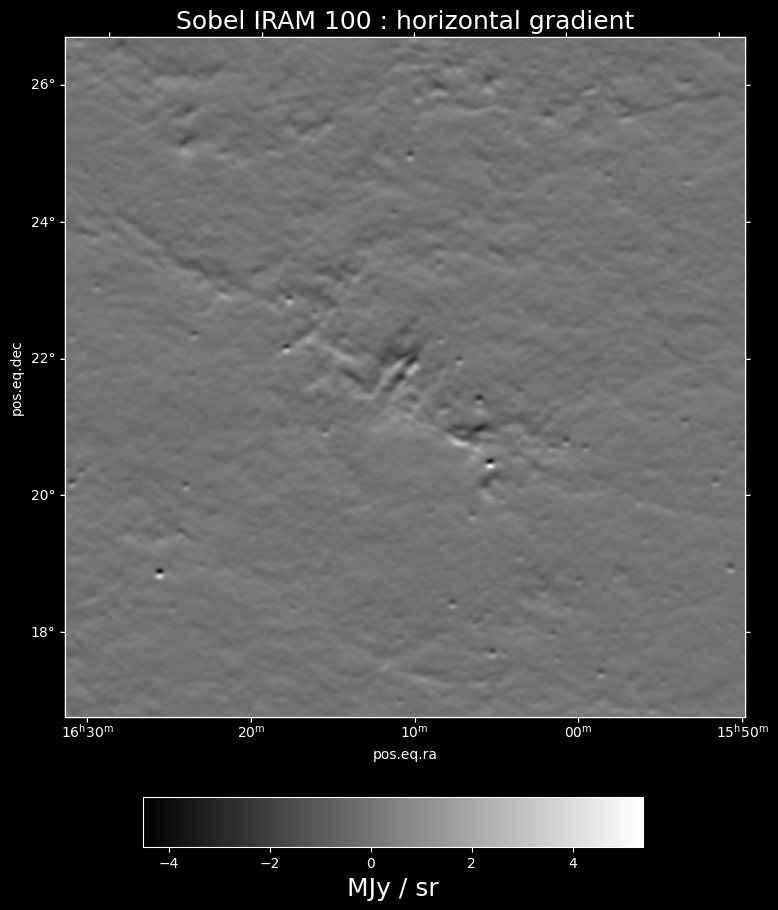

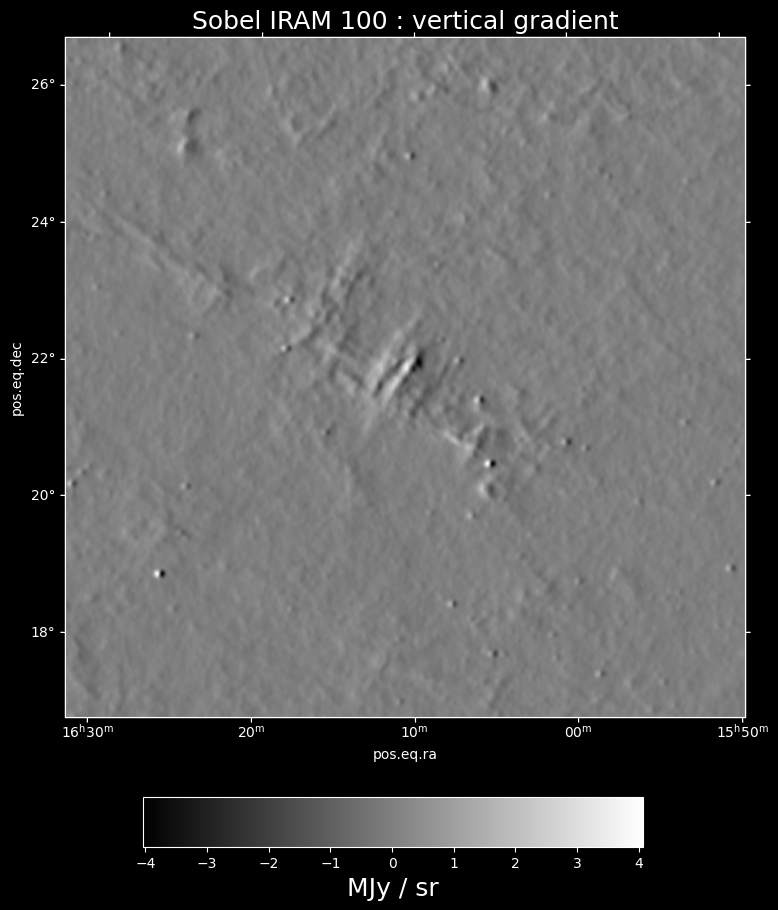

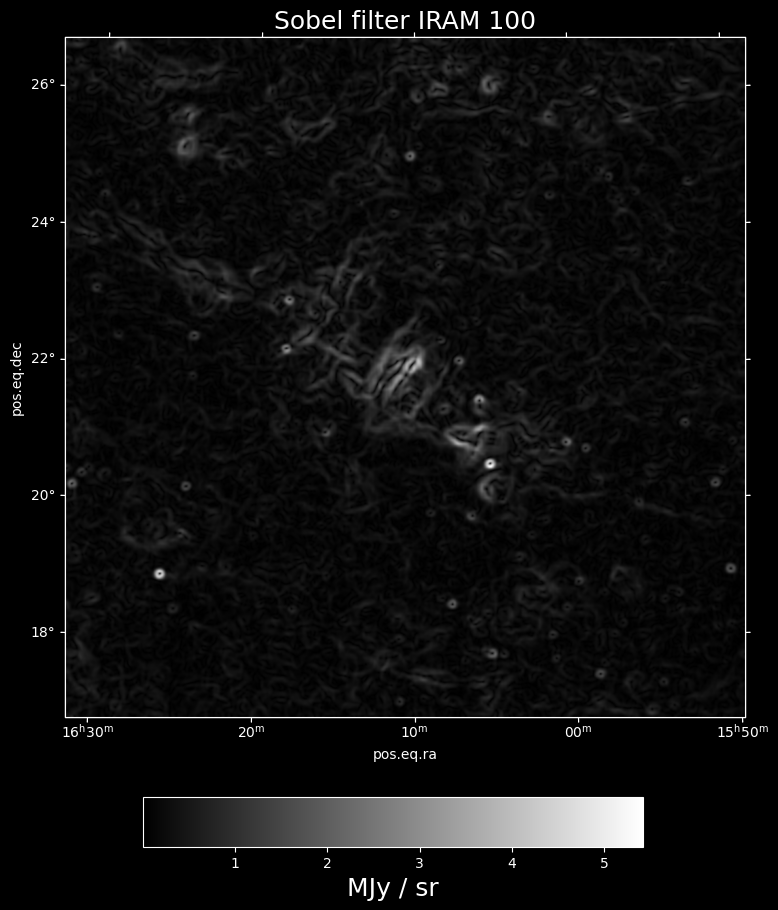

In [5]:
from scipy.ndimage import sobel, gaussian_filter

ir100_gfilt = gaussian_filter(IR100_DATA,sigma=2)
# ir100_gfilt *= IR100_DATA.max()/ir100_gfilt.max()

ir100_x = sobel(ir100_gfilt,axis=0)
ir100_y = sobel(ir100_gfilt,axis=1)

ir100_filt = np.sqrt(ir100_x**2 + ir100_y**2)
# ir100_filt *= IR100_DATA.max()/ir100_filt.max()


filpy.show_image(ir100_gfilt,projection=ir100_wcs,title='Gaussian smoothed IRAM 100',show=True,barlabel=INT_UNIT)
filpy.show_image(ir100_x,projection=ir100_wcs,title='Sobel IRAM 100 : horizontal gradient',show=True,barlabel=INT_UNIT)
filpy.show_image(ir100_y,projection=ir100_wcs,title='Sobel IRAM 100 : vertical gradient',show=True,barlabel=INT_UNIT)
filpy.show_image(ir100_filt,projection=ir100_wcs,title='Sobel filter IRAM 100',show=True,barlabel=INT_UNIT)


Subtract the Sobel filtered image from the smoothed one to magnify the structures

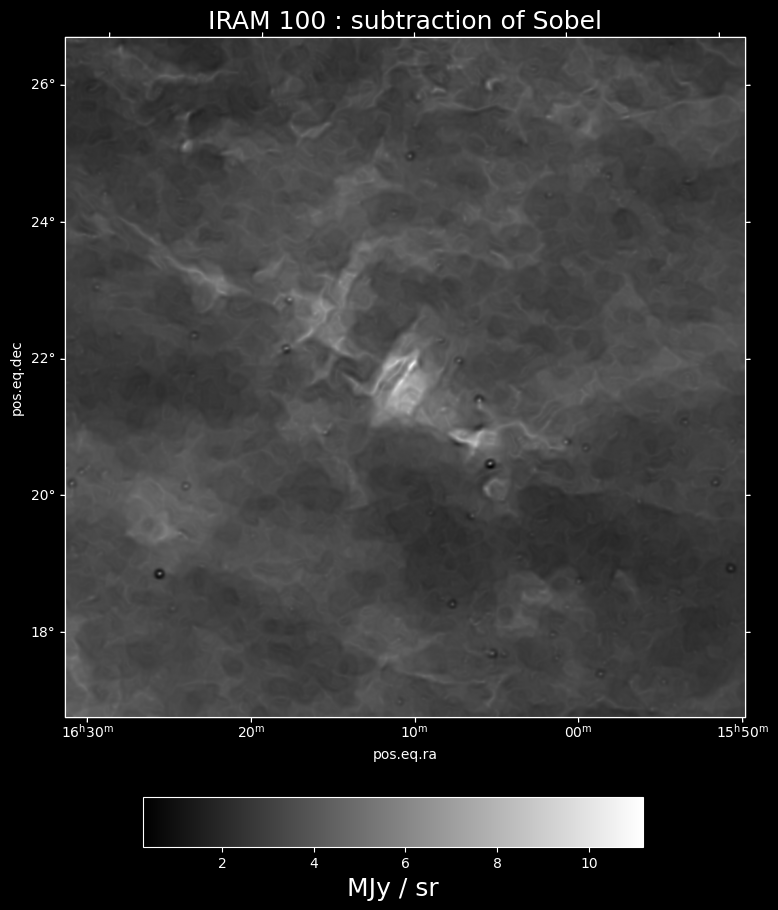

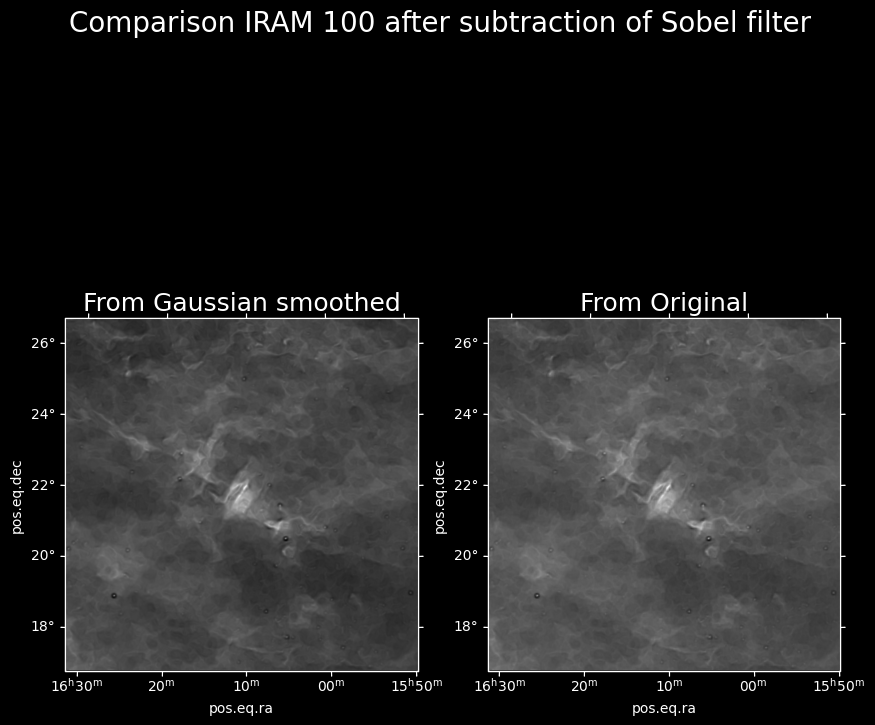

In [6]:
ir100 = ir100_gfilt-ir100_filt
filpy.show_image(ir100_gfilt-ir100_filt,projection=ir100_wcs,title='IRAM 100 : subtraction of Sobel',show=True,barlabel=INT_UNIT)
filpy.show_image([ir100,IR100_DATA-ir100_filt],num_plots=(1,2),projection=ir100_wcs,title='Comparison IRAM 100 after subtraction of Sobel filter',subtitles=('From Gaussian smoothed','From Original'),show=True,colorbar=False)


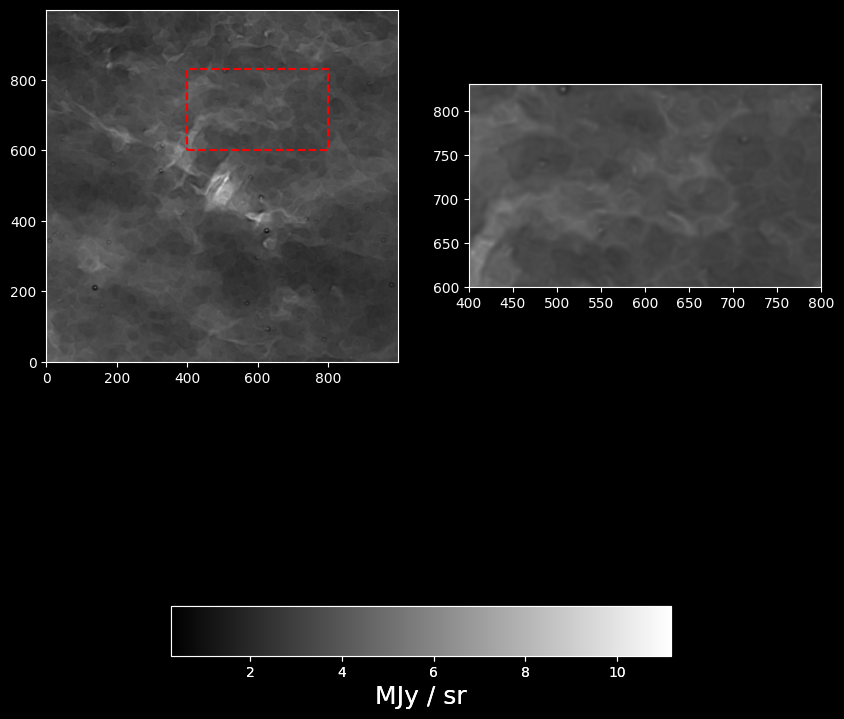

In [7]:
def rectangle(x_edges: tuple[int,int], y_edges: tuple[int,int]) -> tuple[list[int],list[int]]:
    return ([*x_edges]+[x_edges[1]]*2+[*x_edges[::-1]]+[x_edges[0]]*2, [y_edges[0]]*2+[*y_edges]+[y_edges[1]]*2+[*y_edges[::-1]])
xedges = (400,800)
yedges = (600,830)
fig,ax = filpy.show_image([ir100,ir100],num_plots=(1,2),barlabel=INT_UNIT)
ax[1].set_xlim(*xedges)
ax[1].set_ylim(*yedges)
ax[0].plot(*rectangle(xedges,yedges),'--',color='red')

plt.show()

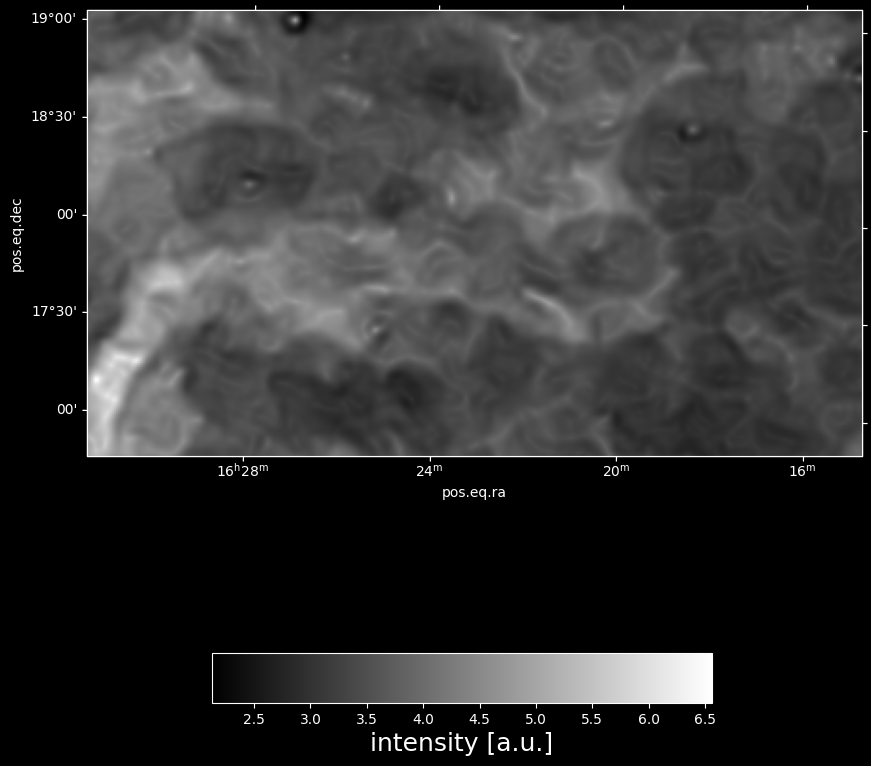

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5 69.5
 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5 81.5 82.5 83.5
 84.5 85.5 86.5 87.5 88.5 89.5 90.5 91.5 92.5 93.5 94.5 95.5 96.5 97.5
 98.5]
[            nan             nan             nan             nan
             nan             nan             nan             nan
  2.14583333e+02 -1.53321546e-01 -7.93505028e-01  3.66876310e-01
  2.67100000e+02             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan         

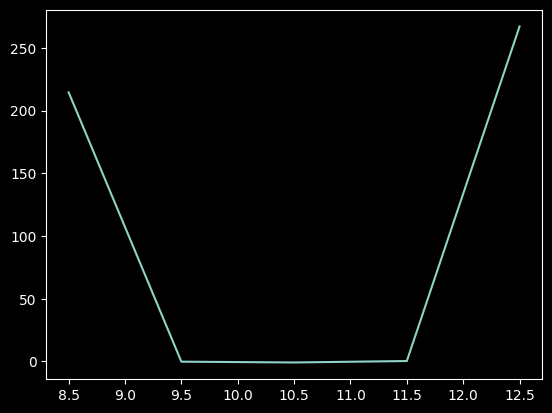

In [ ]:

ir100_cut = np.copy(ir100[slice(*yedges),slice(*xedges)])
filpy.show_image(ir100_cut,projection=ir100_wcs,show=True)

def distance(p1: tuple[int,int],p2: tuple[int,int]) -> float:
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    return np.sqrt(np.sum(p1**2-p2**2))

def corr_r(r: float, image: np.ndarray) -> float:
    shape = image.shape
    prod = np.array([ [  for j in range(shape[1])] for i in range(shape[0])])